# XOR 게이트
###  패키지 참조 


In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop,SGD # 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수
import pandas as pd 




### 랜덤 시드값 고정

In [2]:
np.random.seed(777)

### 데이터 셋 구성

In [3]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[1],[1],[0]])


#### 3) 데이터 전처리 
-> 안해도 됌

#### 4) 탐색적 데이터 분석


In [4]:
label = train_y.flatten()
df=pd.DataFrame(train_x,index = label,columns=['x1','x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


#### 5) 데이터셋 분할 
분할 x 

#### 6) 모델 개발
모델정의

In [5]:
### input_shape은 2차원 임 
model = Sequential()
model.add(Dense(2,input_shape = (2,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = SGD(),loss = mse, metrics = ['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [6]:
hist = model.fit(train_x,train_y,epochs=1000)
result_df = pd.DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df


Epoch 1/1000


1/1 [==============================] - 1s 804ms/step - loss: 0.2516 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2516 - acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2516 - acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2516 - acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2516 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2516 - acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2515 - acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2515 - acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2515 - acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2515 - acc: 0.0000e+00
Epoch 11/1000
1/1 [========================

,loss,acc
epochs,,
1,0.251607,0.5
2,0.251596,0.0
3,0.251585,0.0
4,0.251574,0.0
5,0.251564,0.0
...,...,...
996,0.239945,1.0
997,0.239930,1.0
998,0.239915,1.0


### 7) 학습결과 평과 
학습결과 시각화



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


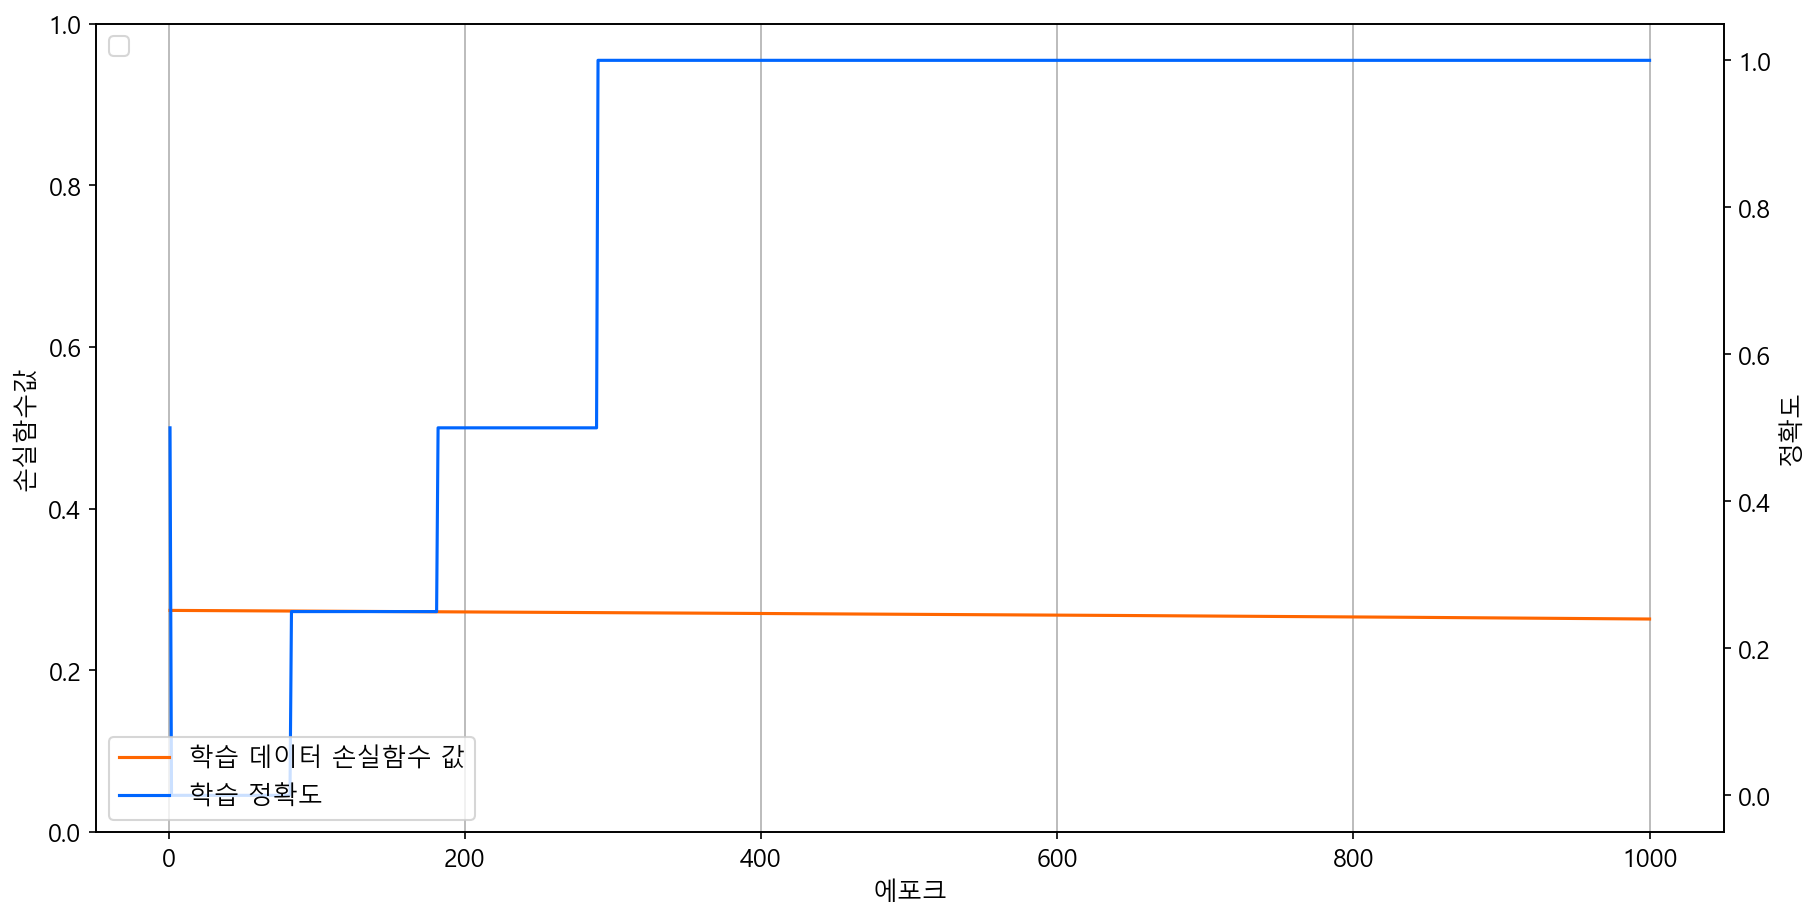

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df,x=result_df.index,y='loss',color='#ff6600',label='학습 데이터 손실함수 값')
ax1.set_xlabel('에포크')
ax1.set_ylabel('손실함수값')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df,x=result_df.index,y='acc',color='#0066ff',label='학습 정확도')
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

#### 모델 성능평가

In [8]:
ev = model.evaluate(train_x,train_y)
print(f"손실함수값: {ev[0]}  정확도: {ev[1]}")

1/1 [==============================] - 0s 301ms/step - loss: 0.2399 - acc: 1.0000
손실함수값: 0.2398683726787567  정확도: 1.0


#### 가중치 편향 확인

In [9]:
weight = model.get_weights()
weight


[array([[-0.61108446,  0.35004723],
        [ 0.4715827 , -0.43264323]], dtype=float32),
 array([1.1979511e-04, 7.2284107e-05], dtype=float32),
 array([[0.21699303],
        [0.17834274]], dtype=float32),
 array([-0.01486009], dtype=float32)]

### 8) 학습 결과 적용

In [10]:
r = model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 327ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
